Use pca and t-sne to visiualize:


  * **[5 pt]** Iras dataset .

  * **[5 pt]** CIFAR10 dataset.

  






In [ ]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns

# I implemented the CIFAR10 dataset first

In [ ]:
from keras.datasets import cifar10

# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train=X_train.reshape(-1,1024)
X_test=X_test.reshape(-1,1024)
print("train data set shape",X_train.shape)
print("test data set shape",X_train.shape)

train data set shape (150000, 1024)
test data set shape (150000, 1024)


In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [ ]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
# Subset first 20k data points to visualize
import numpy as np
x_subset = X_train[0:20000]
y_subset = y_train[0:20000]

print(np.unique(y_subset))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 2.5659916400909424 seconds


In [ ]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.41800599 0.0785217  0.07245747 0.05108043]


<ipython-input-7-73ee13df5a48>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


IndexError: ignored

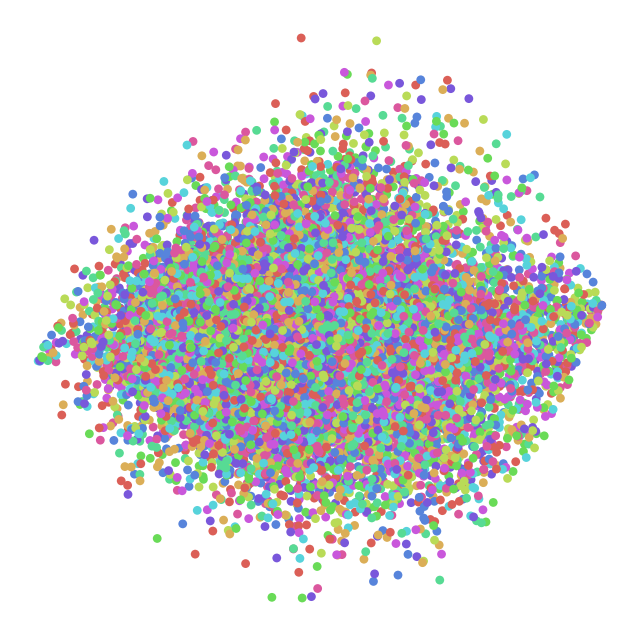

In [ ]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
fashion_scatter(top_two_comp.values,y_subset) # Visualizing the PCA output

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 378.59249901771545 seconds


<ipython-input-22-73ee13df5a48>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-1.5029306, -0.20371422, '0'),
  Text(0.68818223, 0.44629505, '1'),
  Text(-0.43581963, 1.4791458, '2'),
  Text(-2.8531446, -0.12781148, '3'),
  Text(-0.17193392, 0.46194944, '4'),
  Text(0.610729, 1.6501024, '5'),
  Text(-1.6291599, 0.22574285, '6'),
  Text(-1.0301808, -0.17937201, '7'),
  Text(-1.0325601, -0.19185115, '8'),
  Text(0.62261146, 1.1996672, '9')])

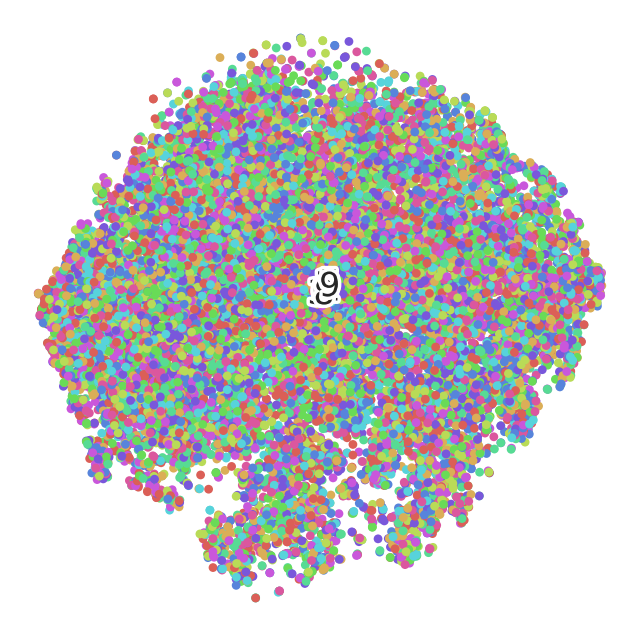

In [ ]:
fashion_scatter(fashion_tsne, y_subset)

In [ ]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 3.9662601947784424 seconds
Cumulative variance explained by 50 principal components: 0.9156614255672609


In [ ]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 343.3697340488434 seconds


<ipython-input-22-73ee13df5a48>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-1.1901138, 0.70260525, '0'),
  Text(-0.6170796, 1.0419405, '1'),
  Text(-0.1989135, 0.28153753, '2'),
  Text(-1.6274643, 0.6313755, '3'),
  Text(0.27521214, 0.60711914, '4'),
  Text(0.17537633, 0.68455446, '5'),
  Text(-0.7061646, 1.0854992, '6'),
  Text(-0.27294427, 0.73786575, '7'),
  Text(-0.67301536, 0.014669642, '8'),
  Text(0.8199744, -0.27784097, '9')])

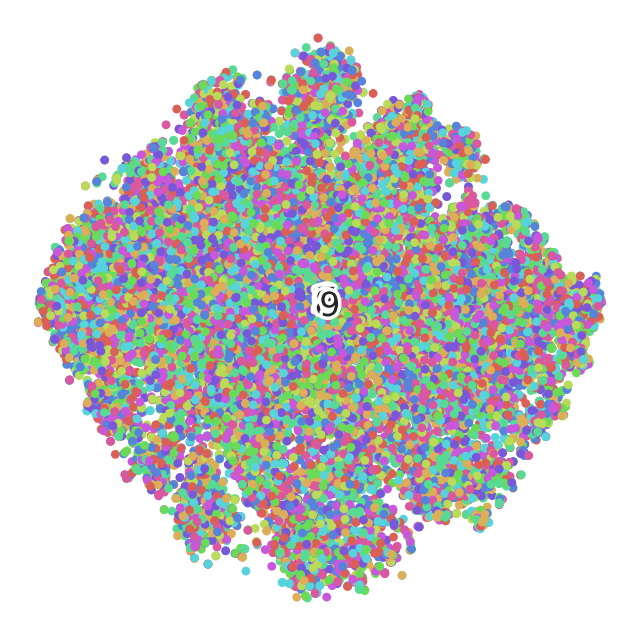

In [ ]:
fashion_scatter(fashion_pca_tsne, y_subset)